# Excavator use-case 5: resource capacities / costs

Solver type:
	-> Standard SAT/SMT solver
Incremental optimizer:
	Found value: 4 elapsed time:0.012s
	Checking better value < 4
	Found value: 3 elapsed time:0.023s
	Checking better value < 3
	Can't find a better solution for problem Excavator5:ResourceCapacitiesCosts.

	Found optimum 3. Stopping iteration.
	total number of iterations: 3
	value: 3
	Excavator5:ResourceCapacitiesCosts satisfiability checked in 0.02s


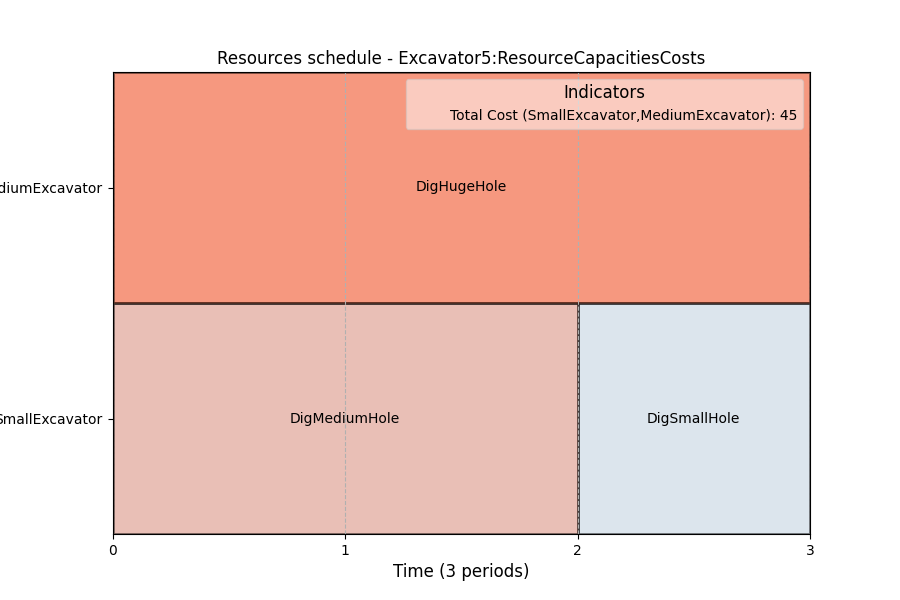

In [2]:
%matplotlib widget
import processscheduler as ps

problem = ps.SchedulingProblem(name="Excavator5:ResourceCapacitiesCosts")

# three tasks
dig_small_hole = ps.VariableDurationTask(name="DigSmallHole", work_amount=3)
dig_medium_hole = ps.VariableDurationTask(name="DigMediumHole", work_amount=7)
dig_huge_hole = ps.VariableDurationTask(name="DigHugeHole", work_amount=15)

# two workers
small_exc = ps.Worker(
    name="SmallExcavator", productivity=4, cost=ps.ConstantFunction(value=5)
)
medium_ex = ps.Worker(
    name="MediumExcavator", productivity=6, cost=ps.ConstantFunction(value=10)
)

dig_small_hole.add_required_resource(
    ps.SelectWorkers(list_of_workers=[small_exc, medium_ex], nb_workers_to_select=1, kind="min")
)
dig_medium_hole.add_required_resource(
    ps.SelectWorkers(list_of_workers=[small_exc, medium_ex], nb_workers_to_select=1, kind="min")
)
dig_huge_hole.add_required_resource(
    ps.SelectWorkers(list_of_workers=[small_exc, medium_ex], nb_workers_to_select=1, kind="min")
)

ps.ObjectiveMinimizeMakespan()

ps.IndicatorResourceCost(list_of_resources=[small_exc, medium_ex])

solver = ps.SchedulingSolver(problem=problem)
solution = solver.solve()
ps.render_gantt_matplotlib(solution)